<a href="https://colab.research.google.com/github/Darkassain123/CE101/blob/main/Team_Project_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# === Setup & Data Loading ===
import pandas as pd
import numpy as np

df = pd.read_csv("/content/heart_cleaned.csv")
df.head()

,age,sex,chest_pain,resting_bp,cholesterol,fbs,restecg,max_heart_rate,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
##from google.colab import files
##uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)



Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/heart_cleaned.csv")


In [ ]:
import pandas as pd

df = pd.read_csv("/content/heart_cleaned.csv")
df.head()


,age,sex,chest_pain,resting_bp,cholesterol,fbs,restecg,max_heart_rate,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Lab 2 – Data Handling & Cleaning

In [ ]:
# Lab 2
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("/content/heart_cleaned.csv")
df.head()


,age,sex,chest_pain,resting_bp,cholesterol,fbs,restecg,max_heart_rate,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape


(303, 14)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    int64  
 1   sex             303 non-null    int64  
 2   chest_pain      303 non-null    int64  
 3   resting_bp      303 non-null    int64  
 4   cholesterol     303 non-null    int64  
 5   fbs             303 non-null    int64  
 6   restecg         303 non-null    int64  
 7   max_heart_rate  303 non-null    int64  
 8   exang           303 non-null    int64  
 9   oldpeak         303 non-null    float64
 10  slope           303 non-null    int64  
 11  ca              303 non-null    int64  
 12  thal            303 non-null    int64  
 13  target          303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.columns


Index(['age', 'sex', 'chest_pain', 'resting_bp', 'cholesterol', 'fbs',
       'restecg', 'max_heart_rate', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'target'],
      dtype='object')

In [ ]:
# Separate features into numerical and categorical
num_features = ['age', 'resting_bp', 'cholesterol', 'max_heart_rate', 'oldpeak']
cat_features = ['sex', 'chest_pain', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [ ]:
df.rename(columns={
    'cp': 'chest_pain',
    'trestbps': 'resting_bp',
    'chol': 'cholesterol',
    'thalach': 'max_heart_rate'
}, inplace=True)


In [ ]:
df.describe()


,age,sex,chest_pain,resting_bp,cholesterol,fbs,restecg,max_heart_rate,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# This code is used to check for missing values.
# If the code says 0 that means that no missing values are found in the database
df.isnull().sum()


,0
age,0
sex,0
chest_pain,0
resting_bp,0
cholesterol,0
fbs,0
restecg,0
max_heart_rate,0
exang,0
oldpeak,0


In [ ]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    int64  
 1   sex             303 non-null    int64  
 2   chest_pain      303 non-null    int64  
 3   resting_bp      303 non-null    int64  
 4   cholesterol     303 non-null    int64  
 5   fbs             303 non-null    int64  
 6   restecg         303 non-null    int64  
 7   max_heart_rate  303 non-null    int64  
 8   exang           303 non-null    int64  
 9   oldpeak         303 non-null    float64
 10  slope           303 non-null    int64  
 11  ca              303 non-null    int64  
 12  thal            303 non-null    int64  
 13  target          303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.to_csv("heart_cleaned.csv", index=False)


In [ ]:
from google.colab import files
files.download("heart_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Lab 3 – Data Exploration & Visualisation

In [ ]:
# Lab 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("heart_cleaned.csv")
df.head()


,age,sex,chest_pain,resting_bp,cholesterol,fbs,restecg,max_heart_rate,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    int64  
 1   sex             303 non-null    int64  
 2   chest_pain      303 non-null    int64  
 3   resting_bp      303 non-null    int64  
 4   cholesterol     303 non-null    int64  
 5   fbs             303 non-null    int64  
 6   restecg         303 non-null    int64  
 7   max_heart_rate  303 non-null    int64  
 8   exang           303 non-null    int64  
 9   oldpeak         303 non-null    float64
 10  slope           303 non-null    int64  
 11  ca              303 non-null    int64  
 12  thal            303 non-null    int64  
 13  target          303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,chest_pain,resting_bp,cholesterol,fbs,restecg,max_heart_rate,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'Age distribuition')

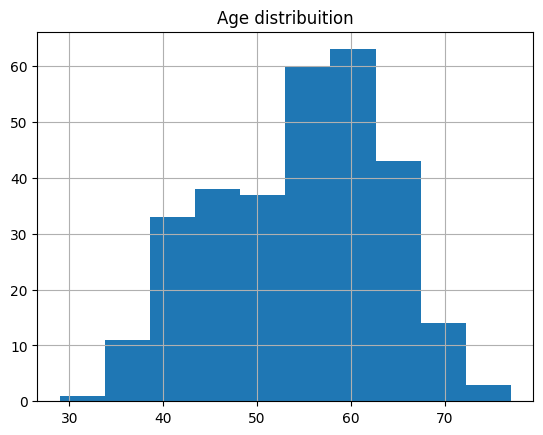

In [ ]:
df['age'].hist(grid=True, bins=10);
plt.title('Age distribuition')

Text(0.5, 1.0, 'Resting Blood pressure distribuition')

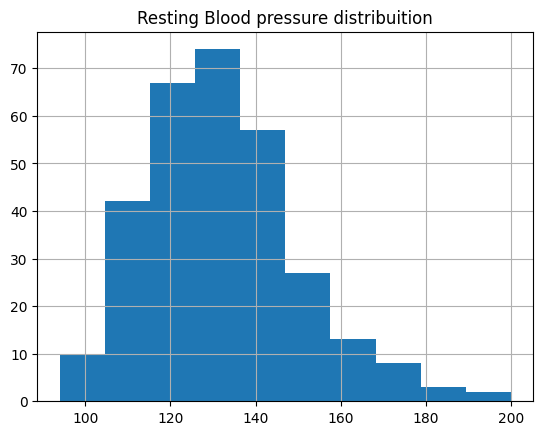

In [ ]:
df['resting_bp'].hist()
plt.title('Resting Blood pressure distribuition')

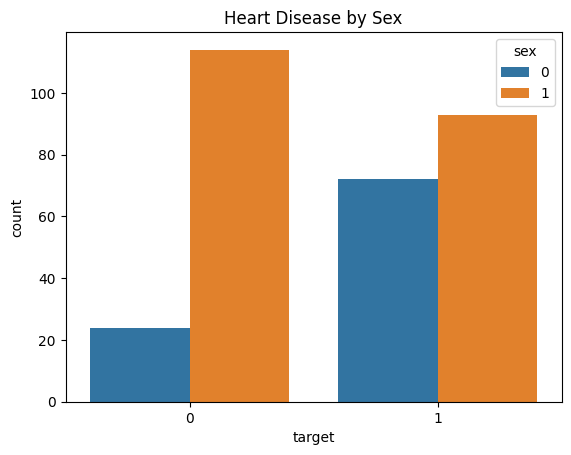

In [ ]:
 # Bar plot showing heart disease cases by sex
sns.countplot(x='target', hue='sex', data=df)
plt.title('Heart Disease by Sex')
plt.show()

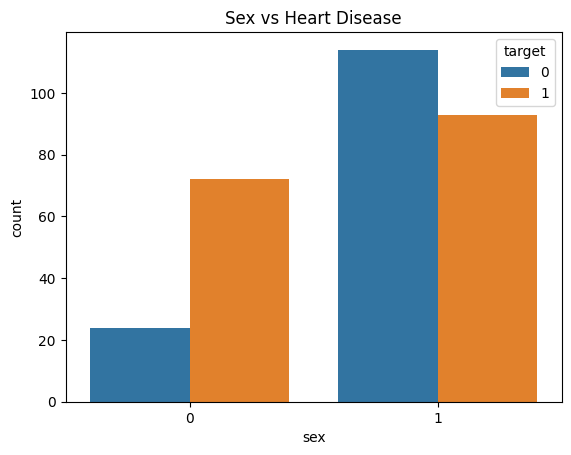

In [ ]:
# Comparing heart disease cases between males and females
sns.countplot(x='sex', hue='target', data=df)
plt.title("Sex vs Heart Disease")
plt.show()


In [ ]:
df['sex'].value_counts()

,count
sex,
1,207
0,96


In [ ]:
df['target'].value_counts()


,count
target,
1,165
0,138


In [ ]:
df.columns


Index(['age', 'sex', 'chest_pain', 'resting_bp', 'cholesterol', 'fbs',
       'restecg', 'max_heart_rate', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'target'],
      dtype='object')

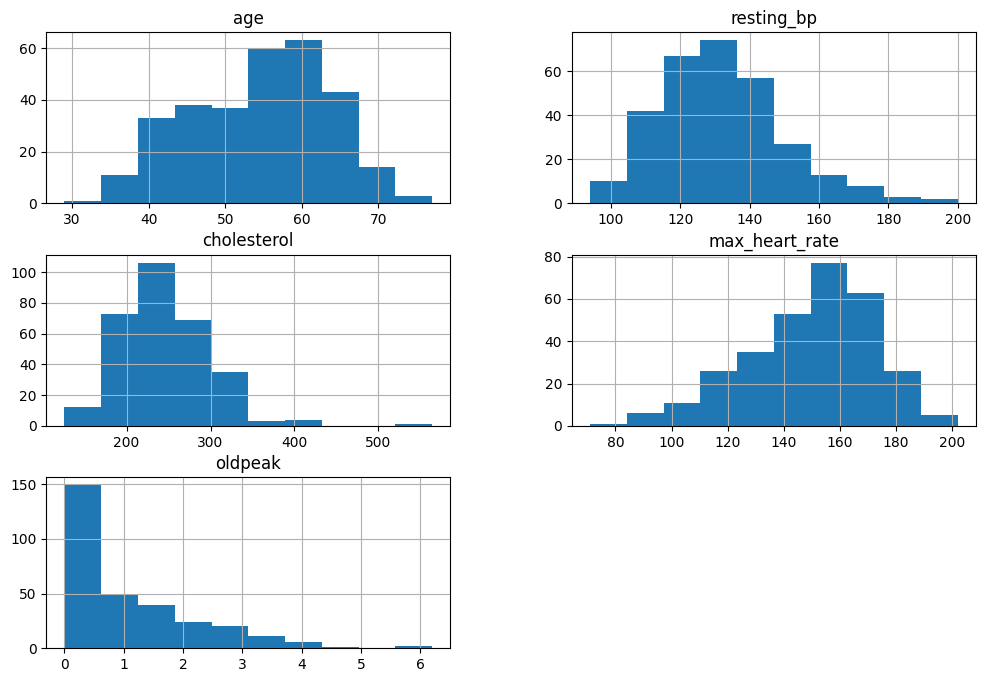

In [ ]:
# Histograms for numerical features
df[['age', 'resting_bp', 'cholesterol', 'max_heart_rate', 'oldpeak']].hist(figsize=(12,8))
plt.show()


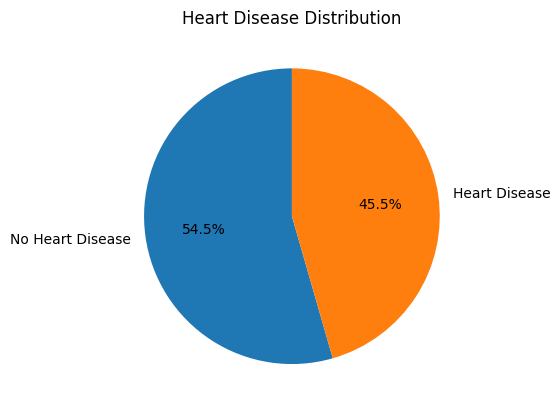

In [ ]:
# Pie chart showing how many patients have heart disease and how many do not
df['target'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=['No Heart Disease', 'Heart Disease'],
    startangle=90
)

plt.title("Heart Disease Distribution")
plt.ylabel("")
plt.show()


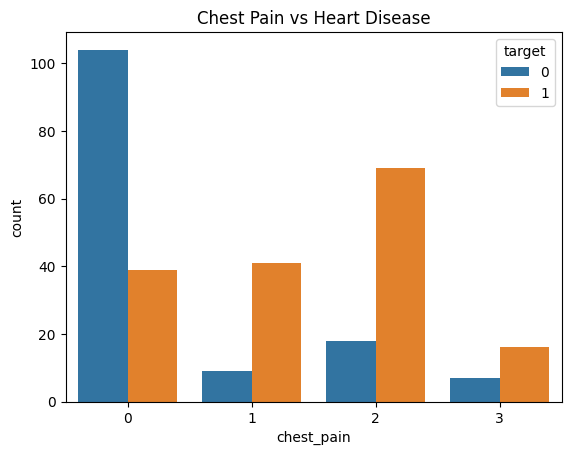

In [ ]:
# Chest pain type compared with heart disease
sns.countplot(x='chest_pain', hue='target', data=df)
plt.title("Chest Pain vs Heart Disease")
plt.show()


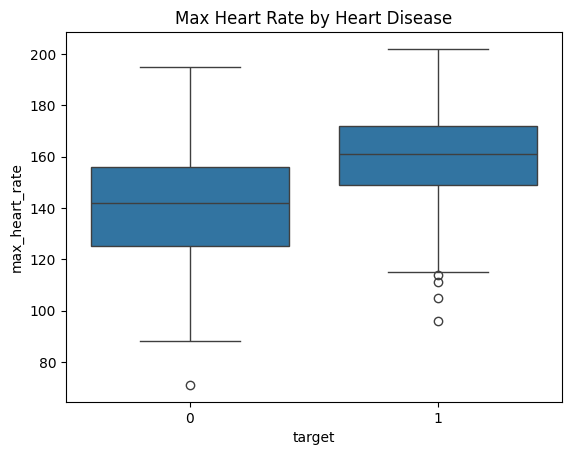

In [ ]:
sns.boxplot(x='target', y='max_heart_rate', data=df)
plt.title('Max Heart Rate by Heart Disease')
plt.show()


**Correlation Between age and heart Disease:**
Ba



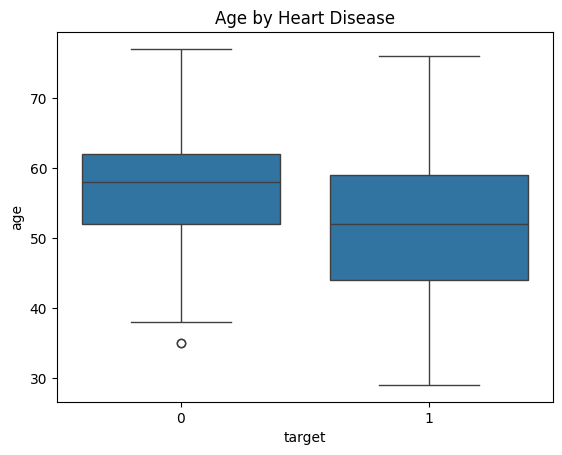

In [ ]:
sns.boxplot(x='target', y='age', data=df)
plt.title('Age by Heart Disease')
plt.show()


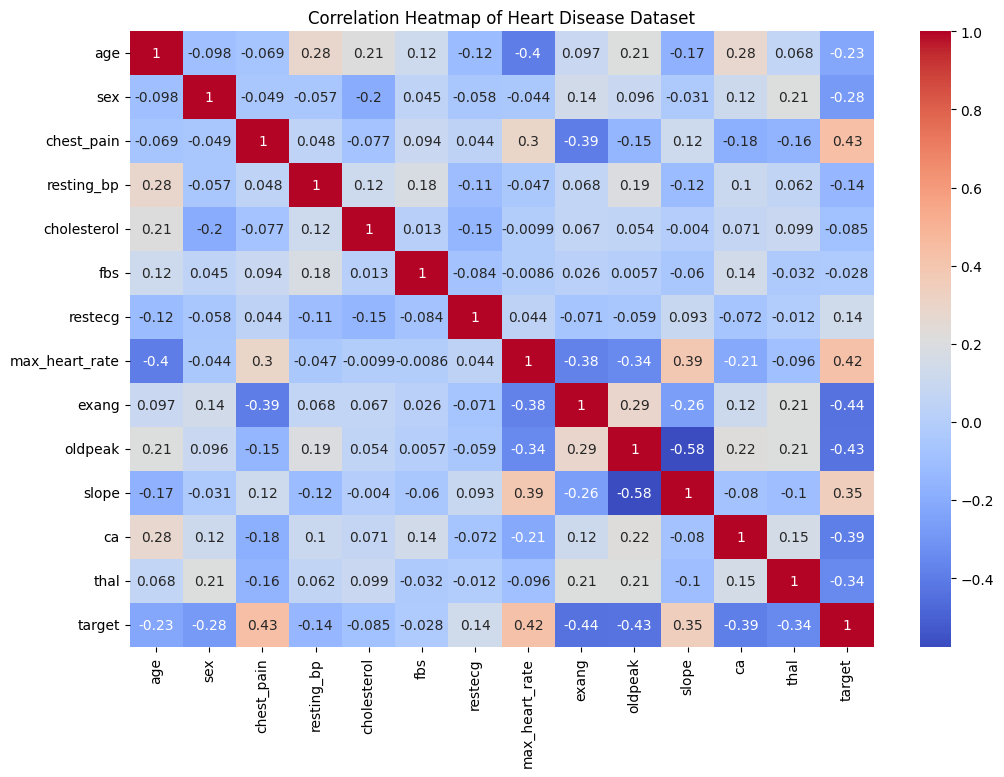

In [ ]:
correlation = df.corr()
correlation

plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Heart Disease Dataset")
plt.show()


In [ ]:
df = pd.read_csv("heart_cleaned.csv")
df.head()


,age,sex,chest_pain,resting_bp,cholesterol,fbs,restecg,max_heart_rate,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Lab 4 – Feature Engineering & Train-Test Splitting


## Lab 4 – Feature Exploration


# New section

In [ ]:
df.groupby(pd.cut(df["age"], bins=5))["max_heart_rate"].mean()


/tmp/ipython-input-1495217531.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df["age"], bins=5))["max_heart_rate"].mean()


,max_heart_rate
age,
"(28.952, 38.6]",174.583333
"(38.6, 48.2]",160.014085
"(48.2, 57.8]",148.536082
"(57.8, 67.4]",143.292453
"(67.4, 77.0]",134.705882


In [ ]:
df.groupby("target")["age"].describe()


,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,138.0,56.601449,7.962082,35.0,52.0,58.0,62.0,77.0
1,165.0,52.496970,9.550651,29.0,44.0,52.0,59.0,76.0


**Correlation between Heart Disease and Age:**

The data shows a relationship between age and heart disease , with individuals who have heart disease (target = 1) being younger on average than people without heart disease ( target = 0). The mean age for people without heart disease is approximately 56.6 years , while those with heart disease have a lower mean age of around 52.2 years. This suggests that , within this dataset , heart disease is not limited to older individuals and may occur earlier in life.

The standard deviation further explains how age is distributed within each group. For individuals without heart disease , the standard deviation is about 7.96 years , indicating that their ages are clustered around the mean. In comparison, individuals with heart disease have a higher standard deviation of approximately 9.55 years , showing a wider spread of ages. This means heart disease affects people across a broader age range.

Overall , the higher variability and lower average in the heart disease group suggest that age alone is not a strong predictor of heart disease in this dataset, and other risk factors play a significant role.

In [ ]:
import pandas as pd

df = pd.read_csv('heart_cleaned.csv')
df.head()


,age,sex,chest_pain,resting_bp,cholesterol,fbs,restecg,max_heart_rate,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = df.drop('target', axis=1)
y = df['target']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,      # 70% train, 30% test
    random_state=42,
    stratify=y          # IMPORTANT for medical data
)


Lab 4 train test split



In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (212, 13)
X_test shape: (91, 13)
y_train shape: (212,)
y_test shape: (91,)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

LAB 5 Split the dataset and Training the machine model